<a href="https://colab.research.google.com/github/sangbk1997/ML-DL-OpenCV/blob/main/keras_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

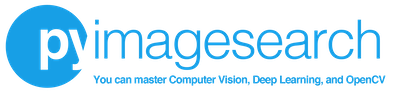

# ImageNet: VGGNet, ResNet, Inception, and Xception with Keras
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [ImageNet: VGGNet, ResNet, Inception, and Xception with Keras](https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/) blog post published on 2017-03-20.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the code zip file

In [ ]:
!wget https://www.pyimagesearch.com/wp-content/uploads/2017/03/keras-networks.zip
!unzip -qq keras-networks.zip
%cd keras-networks

--2020-11-12 11:18:50--  https://www.pyimagesearch.com/wp-content/uploads/2017/03/keras-networks.zip
Resolving www.pyimagesearch.com (www.pyimagesearch.com)... 45.33.87.127
Connecting to www.pyimagesearch.com (www.pyimagesearch.com)|45.33.87.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2340031 (2.2M) [application/zip]
Saving to: ‘keras-networks.zip’

keras-networks.zip  100%[===================>]   2.23M  5.07MB/s    in 0.4s    

2020-11-12 11:18:51 (5.07 MB/s) - ‘keras-networks.zip’ saved [2340031/2340031]

/content/keras-networks


## Blog Post Code

### Import Packages

In [ ]:
# import the necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception # TensorFlow ONLY
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [ ]:
def plt_imshow(title, image):
    # display the image
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

### Classifying images with VGGNet, ResNet, Inception, and Xception with Python and Keras

In [ ]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# ap.add_argument("-model", "--model", type=str, default="vgg16",
# 	help="name of pre-trained network to use")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/soccer_ball.jpg",
    "model": "vgg16"
}

In [ ]:
# define a dictionary that maps model names to their classes
# inside Keras
MODELS = {
	"vgg16": VGG16,
	"vgg19": VGG19,
	"inception": InceptionV3,
	"xception": Xception, # TensorFlow ONLY
	"resnet": ResNet50
}

# esnure a valid model name was supplied via command line argument
if args["model"] not in MODELS.keys():
	raise AssertionError("The --model command line argument should "
		"be a key in the `MODELS` dictionary")

In [ ]:
# initialize the input image shape (224x224 pixels) along with
# the pre-processing function (this might need to be changed
# based on which model we use to classify our image)
inputShape = (224, 224)
preprocess = imagenet_utils.preprocess_input

# if we are using the InceptionV3 or Xception networks, then we
# need to set the input shape to (299x299) [rather than (224x224)]
# and use a different image pre-processing function
if args["model"] in ("inception", "xception"):
	inputShape = (299, 299)
	preprocess = preprocess_input

In [ ]:
# load our the network weights from disk (NOTE: if this is the
# first time you are running this script for a given network, the
# weights will need to be downloaded first -- depending on which
# network you are using, the weights can be 90-575MB, so be
# patient; the weights will be cached and subsequent runs of this
# script will be *much* faster)
print("[INFO] loading {}...".format(args["model"]))
Network = MODELS[args["model"]]
model = Network(weights="imagenet")

[INFO] loading vgg16...
553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
# load the input image using the Keras helper utility while ensuring
# the image is resized to `inputShape`, the required input dimensions
# for the ImageNet pre-trained network
print("[INFO] loading and pre-processing image...")
image = load_img(args["image"], target_size=inputShape)
image = img_to_array(image)

# our input image is now represented as a NumPy array of shape
# (inputShape[0], inputShape[1], 3) however we need to expand the
# dimension by making the shape (1, inputShape[0], inputShape[1], 3)
# so we can pass it through the network
image = np.expand_dims(image, axis=0)

# pre-process the image using the appropriate function based on the
# model that has been loaded (i.e., mean subtraction, scaling, etc.)
image = preprocess(image)

[INFO] loading and pre-processing image...


In [ ]:
# classify the image
print("[INFO] classifying image with '{}'...".format(args["model"]))
preds = model.predict(image)
P = imagenet_utils.decode_predictions(preds)

# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with 'vgg16'...
40960/35363 [==================================] - 0s 0us/step
1. soccer_ball: 93.43%
2. rugby_ball: 6.06%
3. golf_ball: 0.20%
4. volleyball: 0.17%
5. tennis_ball: 0.05%


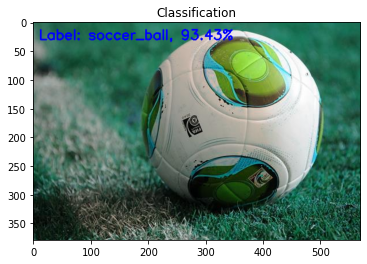

In [ ]:
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread(args["image"])
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
plt_imshow("Classification", orig)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*ImageNet: VGGNet, ResNet, Inception, and Xception with Keras*](https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/) published on 2017-03-30.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```